<a href="https://colab.research.google.com/github/hyphen-ani/Deep-Learning-Pytorch/blob/main/Deep_Learning_NN_Classification_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02. Neural Network Classification With PyTorch

Classification is a problem of predicting whether something is one thing or another (there can be multiple things as the options.)



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn

torch.__version__

'2.3.1+cu121'

## 1. Make Classification Data & Get It Ready - Binary Classification

In [2]:
import sklearn
from sklearn.datasets import make_circles

n_samples = 1000
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [3]:
len(X), len(y)

(1000, 1000)

In [4]:
print(f"First 5 Samples of X : {X[:5]}")
print(f"First 5 Samples of y : {y[:5]}")

First 5 Samples of X : [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 Samples of y : [1 1 1 1 0]


In [5]:
# Make Dataframe of Circles

import pandas as pd
circles = pd.DataFrame({"X1" : X[:, 0],
                        "X2" : X[:, 1],
                        "label" : y})

circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


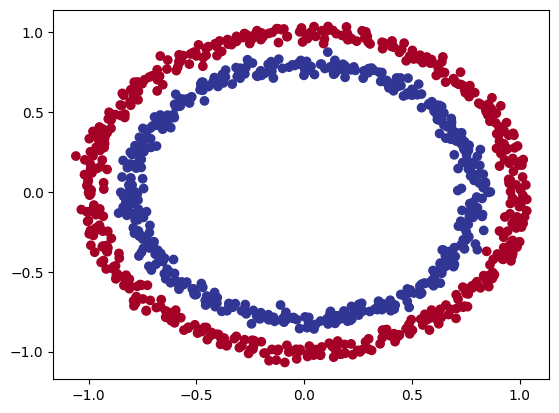

In [6]:
# Visualizing

plt.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap=plt.cm.RdYlBu)

**Note:** The data we're working with is often referred to as a toy dataset, a dataset that is small enough to experiment but still sizable enough to practice the fundaementals.

## 1.1 Check Input & Output Shapes

In [7]:
X.shape, y.shape

((1000, 2), (1000,))

In [8]:
# View the first example of features and labels

X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample}")
print(f"Values for one sample of y: {y_sample}")

Values for one sample of X: [0.75424625 0.23148074]
Values for one sample of y: 1


### 1.2 Turn data into tensors and create train test split

In [9]:
# Turn data into tensors

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [10]:
X.dtype, y.dtype

(torch.float32, torch.float32)

In [11]:
# Split data into training and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## 2. Building a model

Builing a model to classify our blue and red dots.

To do so, we want to:
1. Setup device agnostic code so our code will run on a GPU if there is one
2. Construct a model (by subclassing nn.Module)
3. Define loss function and optimizer
4. Create a training and testing loop
5. Make predictions and evaluate model

In [12]:
from torch import nn
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [13]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

Now we've setup device agnostic code, let's create a model that:

1. Subclass `nn.Module()`
2. Create 2 `nn.Linear()` layers that are capable of handling the shapes of our data
3. Defines a `forward()` method that outlines the forward pass of our model
4. Instantiate an instance of our model class and send it to the target device

In [14]:
# 1. Contruct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. Create 2 nn.Linear Layer capable of handling the shapes of our data

    self.layer_1 = nn.Linear(in_features=2, out_features=5)
    self.layer_2 = nn.Linear(in_features=5, out_features=1)

    # 3. Forward Pass
  def forward(self, x):
    return self.layer_2(self.layer_1(x)) # - x -> Linear_1 -> Linear_2 -> Output

# 4. Instantiate an instance of our model class and send it to the target device

model_version_1 = CircleModelV0().to(device)
model_version_1.state_dict()
model_version_1

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [15]:
# Let's replicate the model above using nn.Sequential - Simpler to make neural networks

model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [16]:
# Making Predictions
untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 Predictions: {(untrained_preds[:10])}")
print(f"\nFirst 10 Labels: {y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200])

First 10 Predictions: tensor([[-0.5739],
        [-0.7658],
        [-0.2353],
        [-0.6691],
        [-0.4962],
        [-0.6113],
        [-0.9448],
        [-0.9093],
        [-0.2248],
        [-0.7815]], grad_fn=<SliceBackward0>)

First 10 Labels: tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### 2.1 Setup Loss Function & Optimizer

Which loss function and optimizer should we use?

Regression: MAE or MSE (Mean Absolute Error or Mean Squared Error)
Classification: Binary Cross Entropy (BCE) or Categorical Cross Entropy (CE)

Loss function measures how well the models prediction or inference is

And for optimizers, most common are SGD and Adam

* For the loss function we're going to use `torch.nn.BCEwithLogitsLoss`

In [17]:
loss_fn = nn.BCEWithLogitsLoss() # Sigmoid Activation Built In
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [18]:
# Calculate Accuracy

def accuracy(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc

## 3.1 Training Model

Going from raw logits -> Prediction Probabilities(Passing through AFn) -> Prediction Labels

We can convert these **logits** into probabilities by passing them through the (sigmoid activation function for BCE). and softmax for multiclass classification

Then we can convert our models prediction probabilities to **prediction labels** by rounding them or taking the `argmax()`


In [19]:
# View the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.5739],
        [-0.7658],
        [-0.2353],
        [-0.6691],
        [-0.4962]])

In [20]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [21]:
# Use the sigmoid activation function on our model logits to turn them into prediction probabilities

y_pred_prob = torch.sigmoid(y_logits)
y_pred_prob

tensor([[0.3603],
        [0.3174],
        [0.4415],
        [0.3387],
        [0.3784]])

For our prediction probability values, we need to perform a range-style rounding on them

* `y_pred_prob` >= 0.5, `y=1`
* `y_pred_prob` < 0.5, `y=0`

In [22]:
# Find the prediction labels
y_pred = torch.round(y_pred_prob)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

#Check for equality
print(torch.eq(y_pred.squeeze(), y_pred_labels.squeeze()))

y_pred.squeeze()

tensor([True, True, True, True, True])


tensor([0., 0., 0., 0., 0.])

In [23]:
## 3.2 Building the training & testing loop

torch.manual_seed(42)

# Set the number of epochs
epochs = 100

# Put data on the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build a training & evaluation loop
for epoch in range(epochs):
  model_0.train()

  #1. Forward Pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  #2. Calculate the loss
  loss = loss_fn(y_logits, y_train)
  acc = accuracy(y_true=y_train, y_pred=y_pred)

  #3. Optimizer Zero Grad
  optimizer.zero_grad()

  #4. Loss Backward
  loss.backward()

  #5. Optimizer Step
  optimizer.step()

  ## Testing
  model_0.eval()
  with torch.inference_mode():
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # Calculate test loss/acc
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy(y_true=y_test, y_pred=test_pred)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.73777, Accuracy: 50.00% | Test Loss: 0.72613, Test Accuracy: 50.00%
Epoch: 10 | Loss: 0.70837, Accuracy: 50.00% | Test Loss: 0.70106, Test Accuracy: 50.00%
Epoch: 20 | Loss: 0.69910, Accuracy: 40.62% | Test Loss: 0.69377, Test Accuracy: 46.00%
Epoch: 30 | Loss: 0.69599, Accuracy: 46.50% | Test Loss: 0.69181, Test Accuracy: 51.00%
Epoch: 40 | Loss: 0.69483, Accuracy: 47.50% | Test Loss: 0.69144, Test Accuracy: 53.00%
Epoch: 50 | Loss: 0.69430, Accuracy: 48.00% | Test Loss: 0.69153, Test Accuracy: 53.00%
Epoch: 60 | Loss: 0.69401, Accuracy: 48.38% | Test Loss: 0.69174, Test Accuracy: 52.00%
Epoch: 70 | Loss: 0.69381, Accuracy: 48.88% | Test Loss: 0.69196, Test Accuracy: 53.00%
Epoch: 80 | Loss: 0.69366, Accuracy: 49.50% | Test Loss: 0.69218, Test Accuracy: 51.00%
Epoch: 90 | Loss: 0.69355, Accuracy: 49.00% | Test Loss: 0.69239, Test Accuracy: 53.00%


## 4. Make predictions and evaluate the model

From the metrics it looks like our model is not learning anything...
Inspecting the data and the predictions

In [24]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download...")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)
  print("Download complete")

Download complete


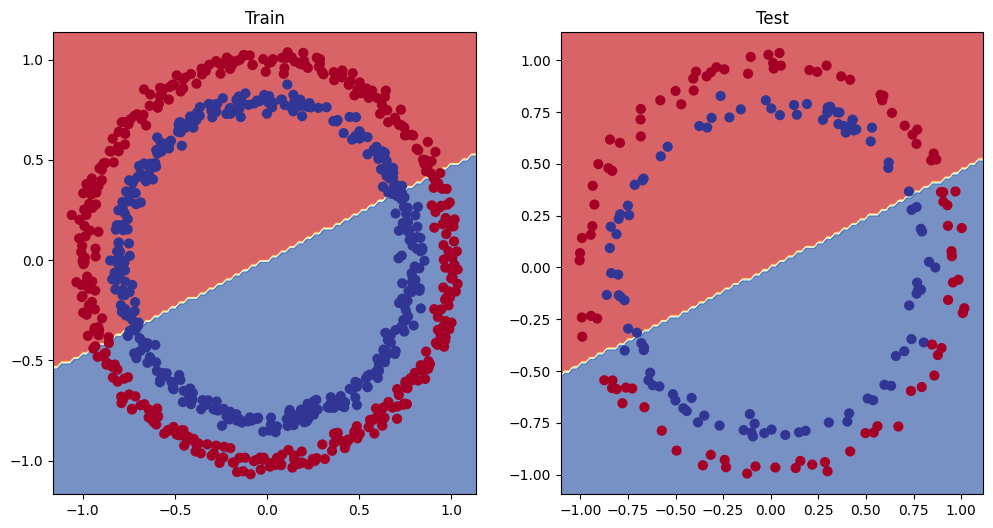

In [25]:
from helper_functions import plot_predictions, plot_decision_boundary

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## 5. Improving a model (from a model perspective)

* Add more layers
* Increase the number of hidden units
* Fit for longer
* Change the activation function
* Change the learning rate
* Change the loss function

These options are all from a models perspective because they deal directly with the model, rather than the data

And becuase these options are all values we can change, they are referred as **hyperparameter**

In [26]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x):
    return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [27]:
# Create a Loss Function

loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

In [28]:
torch.manual_seed(42)

epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train)
  acc = accuracy(y_true=y_train, y_pred=y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_1.eval()
  with torch.inference_mode():
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy(y_true=y_test, y_pred=test_pred)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69396, Accuracy: 50.88% | Test Loss: 0.69261, Test Accuracy: 51.00%
Epoch: 100 | Loss: 0.69305, Accuracy: 50.38% | Test Loss: 0.69379, Test Accuracy: 48.00%
Epoch: 200 | Loss: 0.69299, Accuracy: 51.12% | Test Loss: 0.69437, Test Accuracy: 46.00%
Epoch: 300 | Loss: 0.69298, Accuracy: 51.62% | Test Loss: 0.69458, Test Accuracy: 45.00%
Epoch: 400 | Loss: 0.69298, Accuracy: 51.12% | Test Loss: 0.69465, Test Accuracy: 46.00%
Epoch: 500 | Loss: 0.69298, Accuracy: 51.00% | Test Loss: 0.69467, Test Accuracy: 46.00%
Epoch: 600 | Loss: 0.69298, Accuracy: 51.00% | Test Loss: 0.69468, Test Accuracy: 46.00%
Epoch: 700 | Loss: 0.69298, Accuracy: 51.00% | Test Loss: 0.69468, Test Accuracy: 46.00%
Epoch: 800 | Loss: 0.69298, Accuracy: 51.00% | Test Loss: 0.69468, Test Accuracy: 46.00%
Epoch: 900 | Loss: 0.69298, Accuracy: 51.00% | Test Loss: 0.69468, Test Accuracy: 46.00%


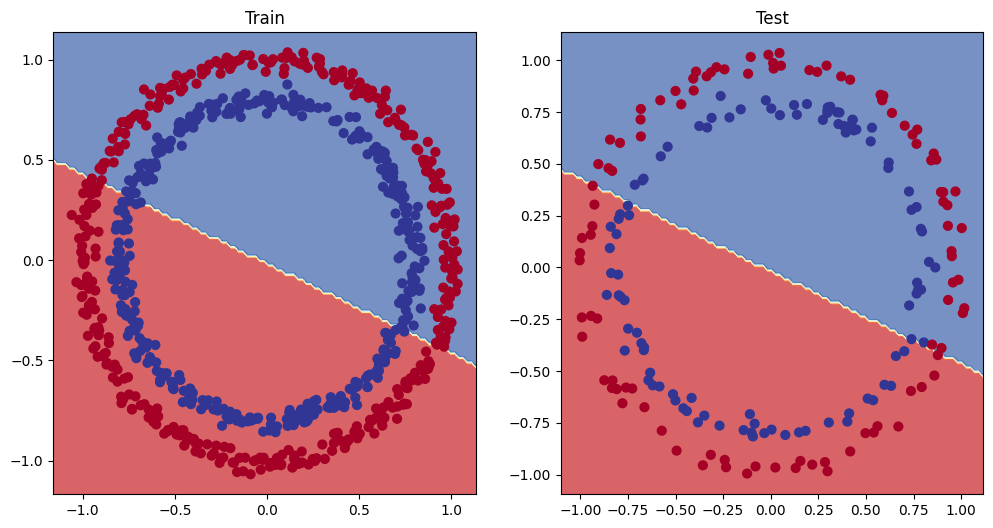

In [29]:
# plot the decision boundary
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

### 5.1 Preparing data to see if our model can fit a straight line

One way to troubleshoot a larger problem is to test out a smaller problem

In [30]:
# Create some data

weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.01

X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias

print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [31]:
# Create train and test split

train_split = int(0.8*len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

print(len(X_train_regression), len(X_test_regression))
print(len(y_train_regression), len(y_test_regression))

80 20
80 20


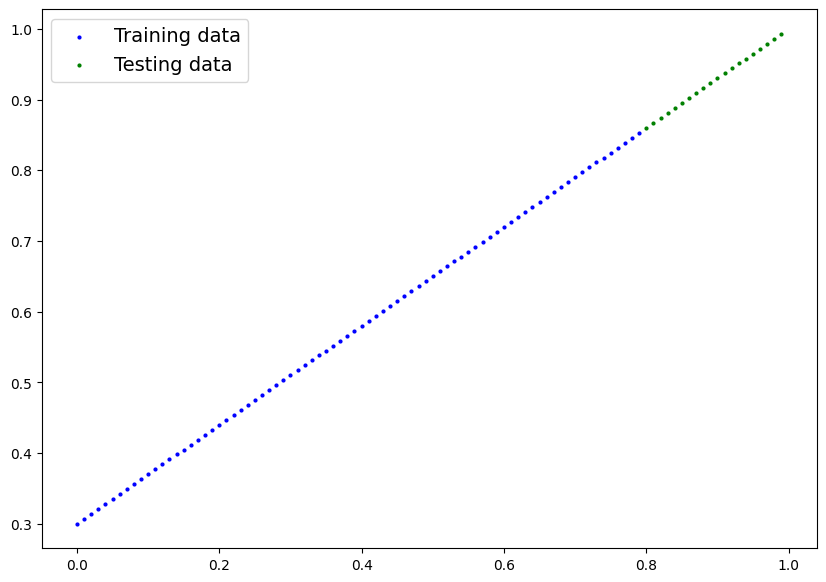

In [32]:
from helper_functions import plot_predictions

plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression)

### 5.2 Adjusting `model_1_upgraded` to fit a straight line

In [33]:
# Same architecture as model_1

model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [34]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.01)

In [35]:
# Train Model

torch.cuda.manual_seed(42)

epochs = 1000

X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

# Training

for epoch in range(epochs):
  model_2.train()
  y_pred = model_2(X_train_regression)
  loss = loss_fn(y_pred, y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # Testing

  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test_regression)
    test_loss = loss_fn(test_pred, y_test_regression)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test Loss: {test_loss:.5f}")

Epoch: 0 | Loss: 0.75986 | Test Loss: 0.91103
Epoch: 100 | Loss: 0.02858 | Test Loss: 0.00081
Epoch: 200 | Loss: 0.02533 | Test Loss: 0.00209
Epoch: 300 | Loss: 0.02137 | Test Loss: 0.00305
Epoch: 400 | Loss: 0.01964 | Test Loss: 0.00341
Epoch: 500 | Loss: 0.01940 | Test Loss: 0.00387
Epoch: 600 | Loss: 0.01903 | Test Loss: 0.00379
Epoch: 700 | Loss: 0.01878 | Test Loss: 0.00381
Epoch: 800 | Loss: 0.01840 | Test Loss: 0.00329
Epoch: 900 | Loss: 0.01798 | Test Loss: 0.00360


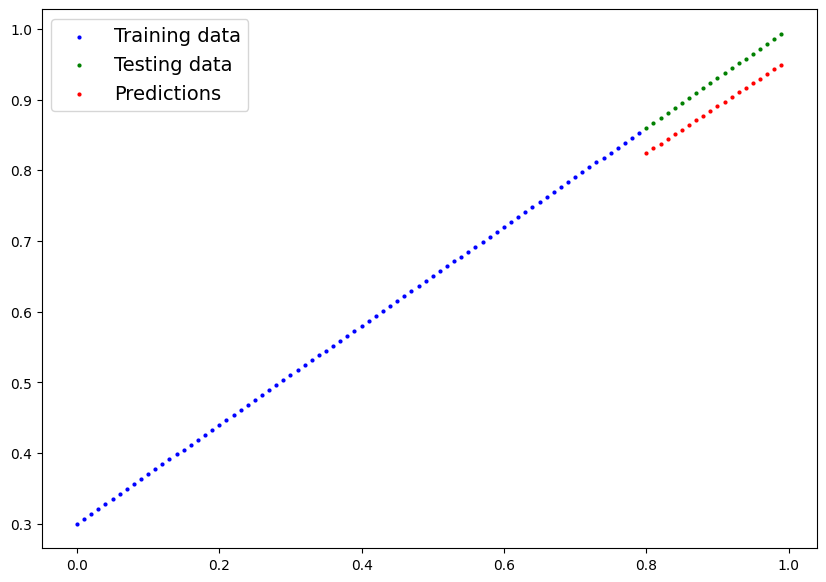

In [36]:
# Turn on evaluation mode
model_2.eval()
with torch.inference_mode():
  y_preds = model_2(X_test_regression)


plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu())

### 6. Missing Piece: Non-Linearity

"What patterns could you draw if you were given an infinite amount of straight and non-straight lines?"

### 6.1 Recreating non-linear data

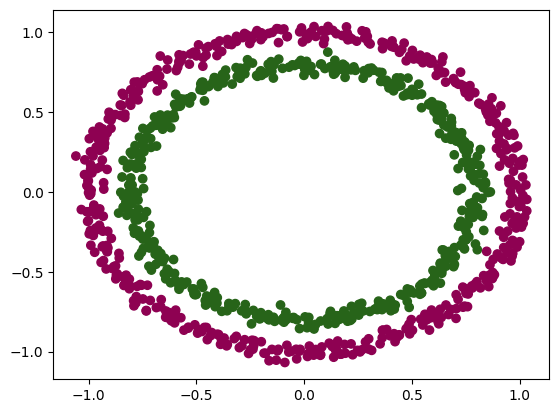

In [37]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples, noise=0.03, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.PiYG)

In [38]:
# Convert data to tensors
import torch
from sklearn.model_selection import train_test_split

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train[:5]

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        [-0.9666, -0.2256],
        [-0.1666,  0.7994]])

## 6.2 Building a model with Non-Linearity

* Linear -> Straight Lines
* Non-Linear -> Non_Straight Lines

Artificial Neural Networks are a large combination of linear and non-linear functions which are potentially able to find patterns in data.


In [39]:
## Building a model with non-linearity

class CircleModelNonLinear(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

    self.relu = nn.ReLU()

  def forward(self, x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelNonLinear().to(device)
model_3

CircleModelNonLinear(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [40]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.1)

In [41]:
### 6.3 Training a Model with non-linearity

torch.manual_seed(42)

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

epochs = 10000

for epoch in range(epochs):
  model_3.train()

  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train)
  acc = accuracy(y_true=y_train, y_pred=y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss - loss_fn(test_logits, y_test)
    test_acc = accuracy(y_true=y_test, y_pred=test_pred)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69541, Accuracy: 50.00% | Test Loss: 0.03951, Test Accuracy: 50.00%
Epoch: 100 | Loss: 0.69015, Accuracy: 53.12% | Test Loss: 0.03951, Test Accuracy: 50.00%
Epoch: 200 | Loss: 0.68791, Accuracy: 54.25% | Test Loss: 0.03951, Test Accuracy: 54.50%
Epoch: 300 | Loss: 0.68421, Accuracy: 58.88% | Test Loss: 0.03951, Test Accuracy: 59.00%
Epoch: 400 | Loss: 0.67898, Accuracy: 62.25% | Test Loss: 0.03951, Test Accuracy: 64.50%
Epoch: 500 | Loss: 0.67115, Accuracy: 64.00% | Test Loss: 0.03951, Test Accuracy: 67.50%
Epoch: 600 | Loss: 0.65742, Accuracy: 72.00% | Test Loss: 0.03951, Test Accuracy: 69.50%
Epoch: 700 | Loss: 0.63149, Accuracy: 85.12% | Test Loss: 0.03951, Test Accuracy: 84.00%
Epoch: 800 | Loss: 0.58168, Accuracy: 91.88% | Test Loss: 0.03951, Test Accuracy: 91.50%
Epoch: 900 | Loss: 0.49246, Accuracy: 93.88% | Test Loss: 0.03951, Test Accuracy: 93.50%
Epoch: 1000 | Loss: 0.35207, Accuracy: 99.00% | Test Loss: 0.03951, Test Accuracy: 97.00%
Epoch: 1100 | Loss: 0.

In [42]:
### 6.4 Evaluating a model trained with non-linear activation function

model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()

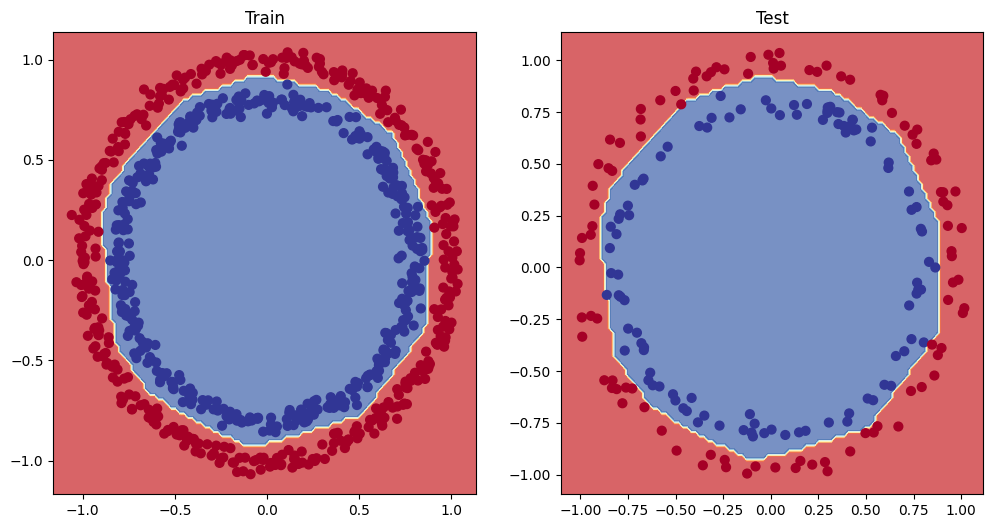

In [43]:
# Plot decision boundaries
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

### 7. Replicating non-linear activation function

Neural Networks, rather than us telling the model what to learn, we givw it the tools to discover patterns in data and it tries to figure out the patterns on its own.

And these tools are called **activation functions (linear, non-linear)**

In [44]:
## Creating a tensot

A =  torch.arange(-10, 10, 1, dtype=torch.float32)
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

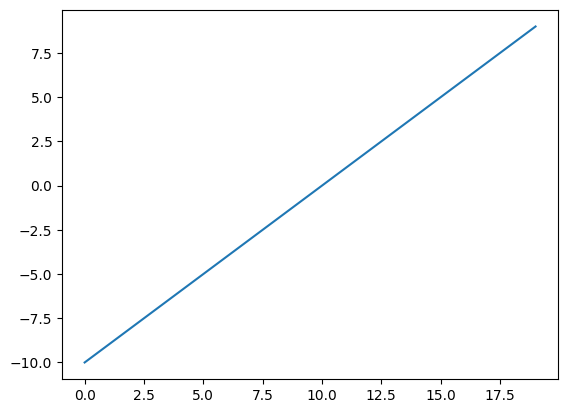

In [45]:
# Visualize
plt.plot(A)

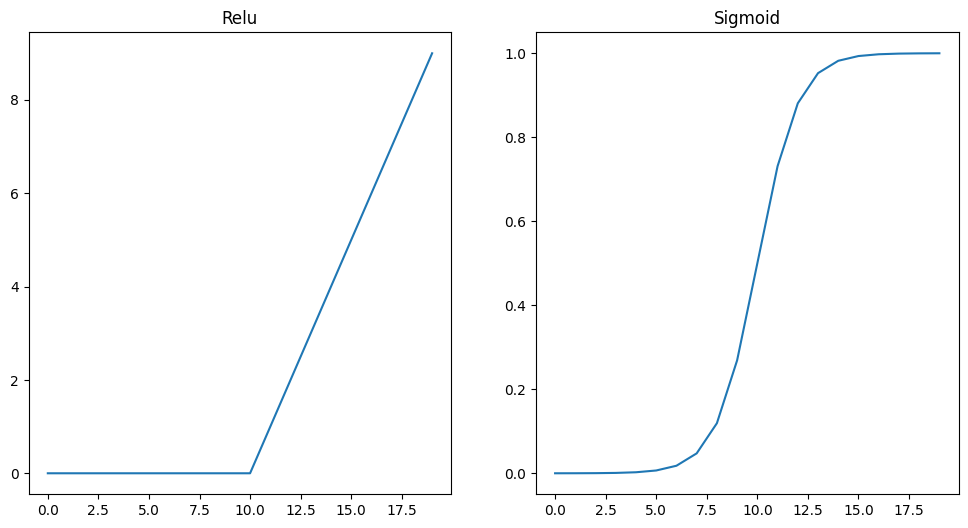

In [46]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Relu")
plt.plot(torch.relu(A))
plt.subplot(1, 2, 2)
plt.title("Sigmoid")
plt.plot(torch.sigmoid(A))

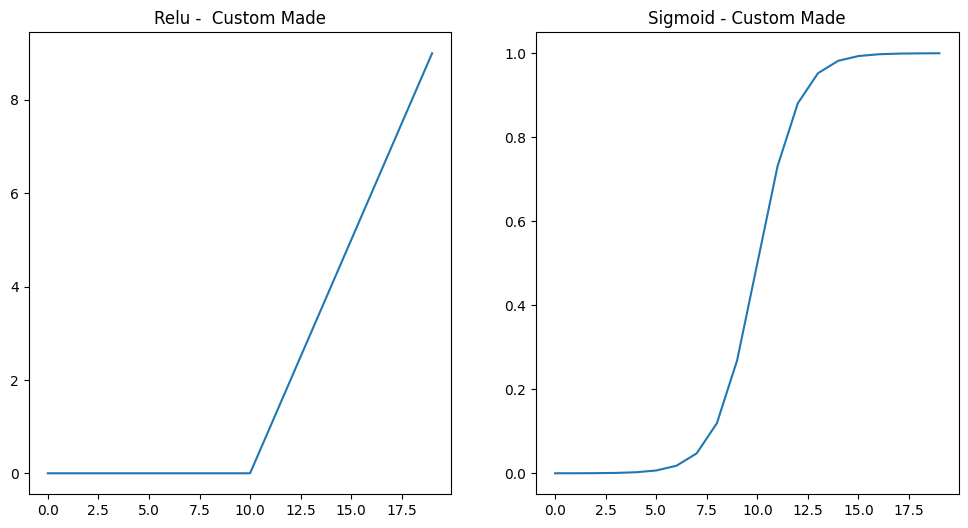

In [47]:
def relu(x: torch.Tensor) -> torch.Tensor:
  return torch.maximum(torch.tensor(0), x)

def sigmoid(x: torch.Tensor) -> torch.Tensor:
  return 1/(1 + torch.exp(-x))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Relu -  Custom Made")
plt.plot(torch.relu(A))
plt.subplot(1, 2, 2)
plt.title("Sigmoid - Custom Made")
plt.plot(torch.sigmoid(A))

### 8. Putting It All Together With Multi-Class Classification

* Binary Classification -> One Thing Or Another (Email Spam Or Not Spam)
* Multi-Class Classification -> More than Two Things (Image Classification)

In [61]:
# 8.1 Creating a toy multi-class dataset

import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters

NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42
SAMPLES = 1000

X_blob, y_blob = make_blobs(n_samples=SAMPLES, n_features=NUM_FEATURES, centers=NUM_CLASSES, cluster_std=1.5, random_state=RANDOM_SEED)

X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, y_blob, test_size=0.2, random_state=RANDOM_SEED)

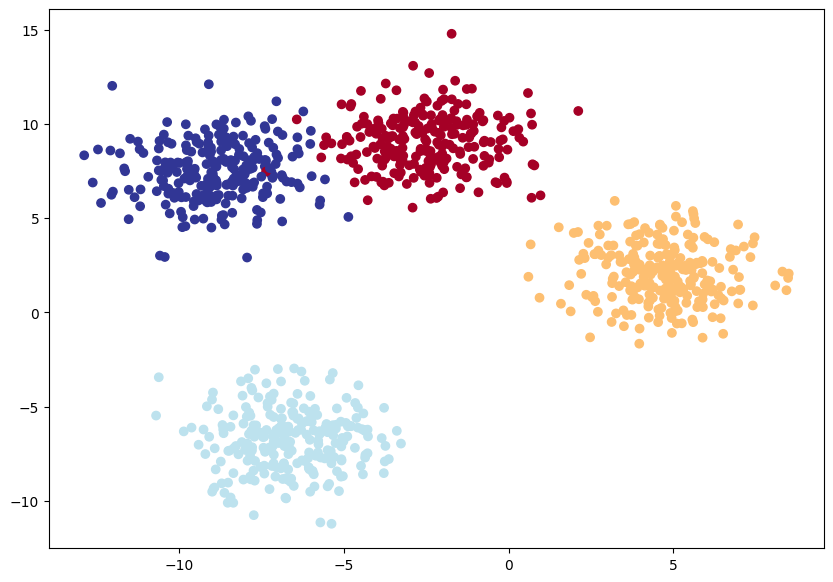

In [62]:
## Plotting Data

plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)

## Building a multi-class classfication model

In [50]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [63]:
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):

    """Intializes multi-class classification model.
    Args:
      input_features (int): Number of input features to the model.
      output_features (int): Number of output features to the model.
      hidden_units (int): Number of hidden units between layers, default 8.
    """
    super().__init__()

    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self, x):
    return self.linear_layer_stack(x)

model_4 = BlobModel(input_features=2, output_features=4, hidden_units=8).to(device)
model_4


BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [64]:
## Loss Function & Optimizer

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_4.parameters(), lr=0.01)

## 8.4 Getting Prediction Probabilities for a multi-class PyTorch Model

In order to evaluate and train and test our model, we need to convert out model's output (logits) to prediction probabilities and then to prediction labels.

Logits -> Pred Probs -> Pred Labels

* Output Classifcation `Softmax`

In [65]:
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test.to(device))

y_logits[:10]

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834],
        [-0.1497, -1.0617, -0.7107, -0.1645],
        [ 0.1539, -0.2887,  0.1520, -0.0109],
        [-0.2154, -1.1795, -0.9300, -0.2745],
        [ 0.2443, -0.2472,  0.1649,  0.0061],
        [-0.2329, -1.2120, -0.9849, -0.3004]])

In [66]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [67]:
y_pred_probs = torch.softmax(y_logits
                             , dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834]])
tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463]])


In [68]:
# Convert Models Prediction Probablities -> Prediction Labels

y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds[:10]

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### 8.5 Creating a training & testing loop for a multi-class PyTorch Model


In [69]:
## Fit multi-class model to the data

torch.manual_seed(42)
epochs = 100

X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
  model_4.train()

  y_logits = model_4(X_blob_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  loss = loss_fn(y_logits, y_blob_train)
  acc = accuracy(y_true=y_blob_train, y_pred=y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_blob_test)
    test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)

    test_loss = loss_fn(test_logits, y_blob_test)
    acc = accuracy(y_true=y_blob_test, y_pred=test_pred)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {acc:.2f}%")


Epoch: 0 | Loss: 1.15883, Accuracy: 46.50% | Test Loss: 1.09778, Test Accuracy: 46.50%
Epoch: 10 | Loss: 0.66860, Accuracy: 93.00% | Test Loss: 0.68123, Test Accuracy: 93.00%
Epoch: 20 | Loss: 0.38183, Accuracy: 99.00% | Test Loss: 0.36981, Test Accuracy: 99.00%
Epoch: 30 | Loss: 0.12265, Accuracy: 99.50% | Test Loss: 0.10953, Test Accuracy: 99.50%
Epoch: 40 | Loss: 0.04622, Accuracy: 99.50% | Test Loss: 0.03843, Test Accuracy: 99.50%
Epoch: 50 | Loss: 0.03069, Accuracy: 99.50% | Test Loss: 0.02161, Test Accuracy: 99.50%
Epoch: 60 | Loss: 0.02691, Accuracy: 99.50% | Test Loss: 0.01760, Test Accuracy: 99.50%
Epoch: 70 | Loss: 0.02535, Accuracy: 99.50% | Test Loss: 0.01534, Test Accuracy: 99.50%
Epoch: 80 | Loss: 0.02456, Accuracy: 99.50% | Test Loss: 0.01451, Test Accuracy: 99.50%
Epoch: 90 | Loss: 0.02404, Accuracy: 99.50% | Test Loss: 0.01350, Test Accuracy: 99.50%


### 8.6 Making and Evaluating Predictions With A PyTorch Multi-Class Model

In [70]:
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)

y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

y_pred[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [71]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [74]:
torch.eq(y_pred[:10], y_blob_test[:10])

tensor([True, True, True, True, True, True, True, True, True, True])

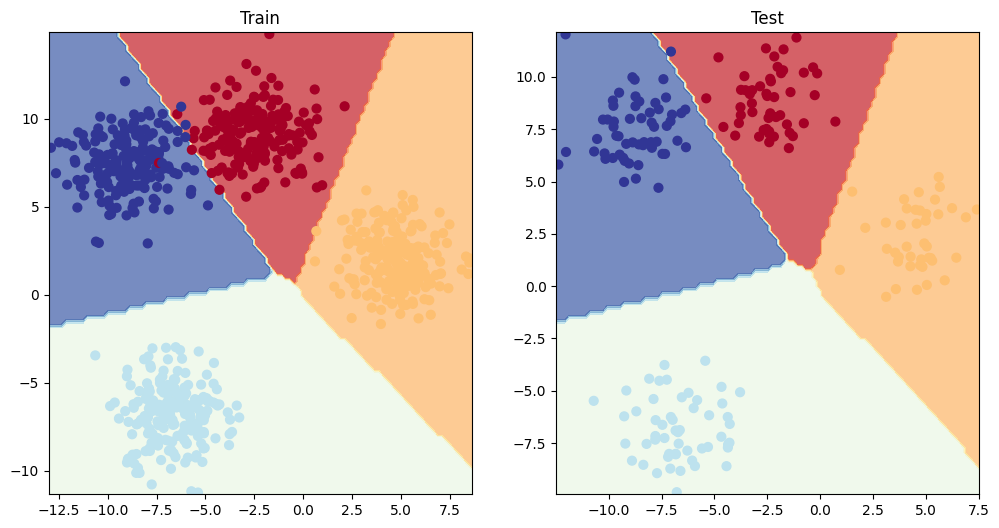

In [75]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

### Classification Metrics (To Evaluate - Classification Model)

* Accuracy - Out of 100 Samples, how many does the model get right? `torchmetrics.Accuracy()` or `sklearn.metric.accuracy_score()`
* Precision - `torchmetrics.Precision()` or `sklearn.metric.precision_score()`
* Recall - `torchmetrics.Recalll()` or `sklearn.metric.recall_score()`
* F1-Score - `torchmetrics.F1Score()` or `sklearn.metric.f1_score()`
* Confusion Matrix - `torchmetrics.ConfusionMatrix()`
* Classification Report

In [76]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 8.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [84]:
from torchmetrics import Accuracy

num_classes = 4
torchmetric_acc = Accuracy(task="multiclass", num_classes=num_classes)
torchmetric_acc(y_pred, y_blob_test)

tensor(0.9950)